### 1-1. 기본 MNIST(Tensorflow)

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#1. 데이터 저장 및 변수 생성
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 28]))
b1 = tf.Variable(tf.random_normal([28]))
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2= tf.Variable(tf.random_normal([28, 28]), name='weight2')
b2 = tf.Variable(tf.random_normal([28]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3= tf.Variable(tf.random_normal([28, nb_classes]), name='weight3')
b3 = tf.Variable(tf.random_normal([nb_classes]), name='bias3')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
#2. hypothesis
hypothesis = tf.nn.softmax(tf.matmul(layer2, W3) + b3)

In [5]:
#3. 비용함수
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [16]:
#4. optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [17]:
#5. prediction tensor 정의
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [18]:
#parameters
training_epochs = 15
batch_size = 100

In [19]:
import random, time
import matplotlib.pyplot as plt

Epoch: 0001 cost = 1.046211348 accuray = 0.800000012
Epoch: 0002 cost = 0.553165467 accuray = 0.839999974
Epoch: 0003 cost = 0.442879243 accuray = 0.889999986
Epoch: 0004 cost = 0.390797881 accuray = 0.899999976
Epoch: 0005 cost = 0.354930080 accuray = 0.939999998
Epoch: 0006 cost = 0.331254262 accuray = 0.879999995
Epoch: 0007 cost = 0.306165370 accuray = 0.939999998
Epoch: 0008 cost = 0.291594944 accuray = 0.910000026
Epoch: 0009 cost = 0.276178140 accuray = 0.920000017
Epoch: 0010 cost = 0.258114714 accuray = 0.939999998
Epoch: 0011 cost = 0.257400366 accuray = 0.899999976
Epoch: 0012 cost = 0.240179243 accuray = 0.959999979
Epoch: 0013 cost = 0.236312562 accuray = 0.860000014
Epoch: 0014 cost = 0.229609750 accuray = 0.920000017
Epoch: 0015 cost = 0.216622107 accuray = 0.970000029
Learning finished
Accuracy:  0.927
Label:  [9]
Prediction:  [9]


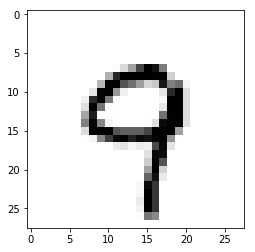

In [20]:
with tf.Session() as sess:

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # 6.학습 진행 Training cycle(15회 반복)
    for epoch in range(training_epochs):
        avg_cost = 0
        
        #number of iterations
        total_batch = int(mnist.train.num_examples / batch_size)
                
        #1epoch 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _, a = sess.run([cost, optimizer, accuracy], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost),
              'accuray =', '{:.9f}'.format(a))
        
    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
        
    #시각화
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

기본 Softmax 함수일 때 90%정도 나왔는데 좀 더 좋아졌다.

### 1-2. 기본 MNIST(Keras)

In [22]:
#0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [23]:
#1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 76s 7us/step


In [24]:
#2. 모델 구성하기(1. 데이터 정의 및 2. 가설 설정)
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

In [26]:
#3. 모델 학습과정 설정하기(3. cost function 4. optimizer 5. accuracy)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
#4. 모델 학습시키기(6. train)
hist = model.fit(x_train, y_train, epochs=15, batch_size=100)

Epoch 1/15
60000/60000 [==============================] - 3s 50us/step - loss: 1.0826 - acc: 0.7280
Epoch 2/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.5859 - acc: 0.8666: 1s - loss: 0.
Epoch 3/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.4587 - acc: 0.8901
Epoch 4/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.3976 - acc: 0.9012
Epoch 5/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3630 - acc: 0.9071
Epoch 6/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3369 - acc: 0.9122:
Epoch 7/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3155 - acc: 0.9172: 1s - loss: 0.31 - ETA: 0s - loss: 0.3155 - acc: 0
Epoch 8/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.2999 - acc: 0.9196: 3s  - ETA: 0s - loss: 0.3001
Epoch 9/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.2865 - acc: 0.9233
Epo

In [28]:
#5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[1.0826497856775921, 0.58585745856165883, 0.45870677635073664, 0.39760554311176138, 0.36302959531545637, 0.33685566668709122, 0.31545800462365148, 0.29985681521395841, 0.28647938765585423, 0.27494910409053169, 0.26445028296361367, 0.25747810501605273, 0.24855611308167377, 0.2407173357779781, 0.23917038244505723]
[0.7280333310117324, 0.86664999971787138, 0.89005000064770379, 0.90121666848659521, 0.90711666882038111, 0.91216666907072064, 0.91715000172456107, 0.91963333507378897, 0.92325000266234081, 0.9257000018159548, 0.92883333484331765, 0.9294333339730898, 0.93148333479960754, 0.93406666974226638, 0.93511666923761372]


In [29]:
#6. 모델 평가하기(7. model evaluate)
loss_and_metircs = model.evaluate(x_test, y_test, batch_size=100)
print("## evaluation loss_and_metrics ##")
print(loss_and_metircs)

10000/10000 [==============================] - 0s 33us/step
## evaluation loss_and_metrics ##
[0.23910675685852767, 0.93630000174045558]


In [30]:
#7. 모델 평가하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print("## yhat ##")
print(yhat)

## yhat ##
[[  5.17563720e-04   1.54603142e-04   9.46832472e-04   1.01054916e-02
    8.11101199e-05   2.32238279e-04   2.86299255e-05   9.85582054e-01
    6.56548829e-04   1.69491209e-03]]


Keras 는 내가 학습률을 지정해주지 않아도 된다. 그래서 93.63% 나왔다.

### 2-1. Upgrade MNIST(Tensorflow)

1) RELU 사용<br/>
2) AdamOptimizer<br/>
3) Weights Initializer Xvaier<br/>
4) Dropout<br/>
5) Batch Normalization

In [1]:
import tensorflow as tf
import numpy as np

#1. 데이터 저장 및 변수 생성
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

#dropout을 위한 placeholder 를 따로 둔다. (훈련 / 시험 나누기 위해서)
keep_prob = tf.placeholder(tf.float32)

#Xavier 초기값
W1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))

#Relu 사용(Vanishing Gradient 방지)
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

#dropout layer
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[256, 128], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([128]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[128, 64], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([64]), name='bias4')
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[64, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([nb_classes]), name='bias5')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
#2. hypothesis
hypothesis = tf.matmul(layer4, W5) + b5

In [3]:
#3. cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

In [4]:
#4. optimizer(Adam)
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

<img src="./photo/adam.png">

In [5]:
#5. prediction tensor 정의
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [6]:
#parameters
training_epochs = 15
batch_size = 100

import random, time
import matplotlib.pyplot as plt

Epoch: 0001 cost = 0.659556384 accuray = 0.889999986
Epoch: 0002 cost = 0.456444497 accuray = 0.920000017
Epoch: 0003 cost = 0.438435822 accuray = 0.920000017
Epoch: 0004 cost = 0.415605340 accuray = 0.939999998
Epoch: 0005 cost = 0.414478996 accuray = 0.829999983
Epoch: 0006 cost = 0.428242233 accuray = 0.879999995
Epoch: 0007 cost = 0.473806663 accuray = 0.879999995
Epoch: 0008 cost = 0.434526913 accuray = 0.879999995
Epoch: 0009 cost = 0.436063575 accuray = 0.939999998
Epoch: 0010 cost = 0.463994310 accuray = 0.879999995
Epoch: 0011 cost = 0.478092829 accuray = 0.899999976
Epoch: 0012 cost = 0.436143533 accuray = 0.920000017
Epoch: 0013 cost = 0.435363550 accuray = 0.910000026
Epoch: 0014 cost = 0.464855079 accuray = 0.910000026
Epoch: 0015 cost = 0.462609173 accuray = 0.910000026
Learning finished
Accuracy:  0.9483
Label:  [0]
Prediction:  [0]


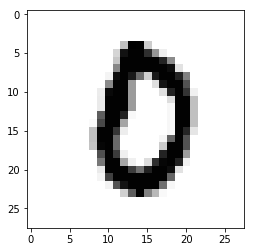

In [ ]:
with tf.Session() as sess:

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # 6.학습 진행 Training cycle(15회 반복)
    for epoch in range(training_epochs):
        avg_cost = 0
        
        #number of iterations
        total_batch = int(mnist.train.num_examples / batch_size)
                
        #1epoch 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _, a = sess.run([cost, optimizer, accuracy], feed_dict={
                            X: batch_xs, Y: batch_ys, keep_prob: 0.7})
            avg_cost += c / total_batch
        
        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost),
              'accuray =', '{:.9f}'.format(a))
        
    print("Learning finished")

    # 7. Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
    

    #시각화
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

### 2-2. Batch Normalization

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("./", one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [9]:
class Model:
    """Network Model Class
    
    Note that this class has only the constructor.
    The actual model is defined inside the constructor.
    
    Attributes
    ----------
    X : tf.float32
        This is a tensorflow placeholder for MNIST images
        Expected shape is [None, 784]
        
    y : tf.float32
        This is a tensorflow placeholder for MNIST labels (one hot encoded)
        Expected shape is [None, 10]
        
    mode : tf.bool
        This is used for the batch normalization
        It's `True` at training time and `False` at test time
        
    loss : tf.float32
        The loss function is a softmax cross entropy
        
    train_op
        This is simply the training op that minimizes the loss
        
    accuracy : tf.float32
        The accuracy operation
        
    
    Examples
    ----------
    >>> model = Model("Batch Norm", 32, 10)

    """
    def __init__(self, name, input_dim, output_dim, hidden_dims=[32, 32], use_batchnorm=True, activation_fn=tf.nn.relu, optimizer=tf.train.AdamOptimizer, lr=0.01):
        """ Constructor
        
        Parameters
        --------
        name : str
            The name of this network
            The entire network will be created under `tf.variable_scope(name)`
            
        input_dim : int
            The input dimension
            In this example, 784
        
        output_dim : int
            The number of output labels
            There are 10 labels
            
        hidden_dims : list (default: [32, 32])
            len(hidden_dims) = number of layers
            each element is the number of hidden units
            
        use_batchnorm : bool (default: True)
            If true, it will create the batchnormalization layer
            
        activation_fn : TF functions (default: tf.nn.relu)
            Activation Function
            
        optimizer : TF optimizer (default: tf.train.AdamOptimizer)
            Optimizer Function
            
        lr : float (default: 0.01)
            Learning rate
        
        """
        with tf.variable_scope(name):
            # Placeholders are defined
            self.X = tf.placeholder(tf.float32, [None, input_dim], name='X')
            self.y = tf.placeholder(tf.float32, [None, output_dim], name='y')
            self.mode = tf.placeholder(tf.bool, name='train_mode')            
            
            # Loop over hidden layers
            net = self.X
            for i, h_dim in enumerate(hidden_dims):
                with tf.variable_scope('layer{}'.format(i)):
                    net = tf.layers.dense(net, h_dim)
                    
                    if use_batchnorm:
                        net = tf.layers.batch_normalization(net, training=self.mode)
                        
                    net = activation_fn(net)
            
            # Attach fully connected layers
            net = tf.contrib.layers.flatten(net)
            net = tf.layers.dense(net, output_dim)
            
            self.loss = tf.nn.softmax_cross_entropy_with_logits(logits=net, labels=self.y)
            self.loss = tf.reduce_mean(self.loss, name='loss')    
            
            # When using the batchnormalization layers,
            # it is necessary to manually add the update operations
            # because the moving averages are not included in the graph            
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=name)
            with tf.control_dependencies(update_ops):                     
                self.train_op = optimizer(lr).minimize(self.loss)
            
            # Accuracy etc 
            softmax = tf.nn.softmax(net, name='softmax')
            self.accuracy = tf.equal(tf.argmax(softmax, 1), tf.argmax(self.y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(self.accuracy, tf.float32))

In [10]:
class Solver:
    """Solver class
    
    This class will contain the model class and session
    
    Attributes
    ----------
    model : Model class
    sess : TF session
        
    Methods
    ----------
    train(X, y)
        Run the train_op and Returns the loss
        
    evalulate(X, y, batch_size=None)
        Returns "Loss" and "Accuracy"
        If batch_size is given, it's computed using batch_size
        because most GPU memories cannot handle the entire training data at once
            
    Example
    ----------
    >>> sess = tf.InteractiveSession()
    >>> model = Model("BatchNorm", 32, 10)
    >>> solver = Solver(sess, model)
    
    # Train
    >>> solver.train(X, y)
    
    # Evaluate
    >>> solver.evaluate(X, y)
    """
    def __init__(self, sess, model):
        self.model = model
        self.sess = sess
        
    def train(self, X, y):
        feed = {
            self.model.X: X,
            self.model.y: y,
            self.model.mode: True
        }
        train_op = self.model.train_op
        loss = self.model.loss
        
        return self.sess.run([train_op, loss], feed_dict=feed)
    
    def evaluate(self, X, y, batch_size=None):
        if batch_size:
            N = X.shape[0]
            
            total_loss = 0
            total_acc = 0
            
            for i in range(0, N, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                
                feed = {
                    self.model.X: X_batch,
                    self.model.y: y_batch,
                    self.model.mode: False
                }
                
                loss = self.model.loss
                accuracy = self.model.accuracy
                
                step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed)
                
                total_loss += step_loss * X_batch.shape[0]
                total_acc += step_acc * X_batch.shape[0]
            
            total_loss /= N
            total_acc /= N
            
            return total_loss, total_acc
            
            
        else:
            feed = {
                self.model.X: X,
                self.model.y: y,
                self.model.mode: False
            }
            
            loss = self.model.loss            
            accuracy = self.model.accuracy

            return self.sess.run([loss, accuracy], feed_dict=feed)

In [11]:
input_dim = 784
output_dim = 10
N = 55000

tf.reset_default_graph()
sess = tf.InteractiveSession()

# We create two models: one with the batch norm and other without
bn = Model('batchnorm', input_dim, output_dim, use_batchnorm=True)
nn = Model('no_norm', input_dim, output_dim, use_batchnorm=False)

# We create two solvers: to train both models at the same time for comparison
# Usually we only need one solver class
bn_solver = Solver(sess, bn)
nn_solver = Solver(sess, nn)

In [12]:
epoch_n = 10
batch_size = 32

# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

In [13]:
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epoch_n):
    for _ in range(N//batch_size):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        
        _, bn_loss = bn_solver.train(X_batch, y_batch)
        _, nn_loss = nn_solver.train(X_batch, y_batch)       
    
    b_loss, b_acc = bn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    n_loss, n_acc = nn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    
    # Save train losses/acc
    train_losses.append([b_loss, n_loss])
    train_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-TRAIN] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    
    b_loss, b_acc = bn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    n_loss, n_acc = nn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    
    # Save valid losses/acc
    valid_losses.append([b_loss, n_loss])
    valid_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-VALID] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    print()

[Epoch 0-TRAIN] Batchnorm Loss(Acc): 0.17398(94.64%) vs No Batchnorm Loss(Acc): 0.18036(94.59%)
[Epoch 0-VALID] Batchnorm Loss(Acc): 0.19834(94.30%) vs No Batchnorm Loss(Acc): 0.19411(94.34%)

[Epoch 1-TRAIN] Batchnorm Loss(Acc): 0.10822(96.55%) vs No Batchnorm Loss(Acc): 0.16093(95.23%)
[Epoch 1-VALID] Batchnorm Loss(Acc): 0.12686(96.18%) vs No Batchnorm Loss(Acc): 0.17837(95.22%)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): 0.08982(97.24%) vs No Batchnorm Loss(Acc): 0.16440(95.29%)
[Epoch 2-VALID] Batchnorm Loss(Acc): 0.11797(96.62%) vs No Batchnorm Loss(Acc): 0.19405(95.16%)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): 0.08890(97.17%) vs No Batchnorm Loss(Acc): 0.16203(95.41%)
[Epoch 3-VALID] Batchnorm Loss(Acc): 0.11283(96.62%) vs No Batchnorm Loss(Acc): 0.19755(95.14%)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): 0.07484(97.64%) vs No Batchnorm Loss(Acc): 0.16005(95.37%)
[Epoch 4-VALID] Batchnorm Loss(Acc): 0.11221(96.80%) vs No Batchnorm Loss(Acc): 0.19260(94.98%)

[Epoch 5-TRAIN] Batchnorm Loss(Acc)

In [ ]:
bn_solver.evaluate(mnist.test.images, mnist.test.labels)

In [ ]:
nn_solver.evaluate(mnist.test.images, mnist.test.labels)

In [ ]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]
    
    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)
        
    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

In [ ]:
plot_compare(train_losses, title='Training Loss at Epoch')

### 2-3. Updated MNIST(Keras)

In [66]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [54]:
width = 28
height = 28

In [55]:
#1. 데이터 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [56]:
x_train = x_train.reshape(60000, width*height).astype('float32')
x_test = x_test.reshape(10000, width*height).astype('float32')

In [57]:
#훈련 셋과 검증 셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [58]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [101]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [106]:
#3. 모델 학습과정 설정하기
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [107]:
#4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 7616/50000 [===>..........................] - ETA: 1:44 - loss: 14.4144 - acc: 0.1057

KeyboardInterrupt: 

NameError: name 'hist' is not defined

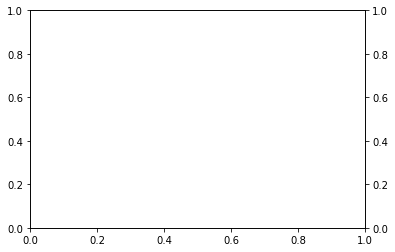

In [108]:
#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['var_loss'], 'y', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history(['acc'], 'b', label='train acc'))
acc_ax.plot(hist.history(['val_acc'], 'g', label='val acc'))
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [109]:
#6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print("# evaluation loss_and_metrics")
print(loss_and_metrics)

10000/10000 [==============================] - 5s 516us/step
# evaluation loss_and_metrics
[14.490167601013184, 0.10100000000000001]


In [110]:
#7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row=0.5
plt_col=0.5

plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt=0
i=0

while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i+=1
        continue
    
    sub_plt = ararr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' + str(np.argmax(yhat_test[i]))
    
    i+=1
    cnt+=1
    
plt.show()

KeyboardInterrupt: 